<h1 style="text-align:center;color:#189D9D">Département Génie Informatique, FST de Tanger, MST MDB/SIM (M. AIT KBIR)</h1> 
<h2 style="text-align:center;"> Module "Apprentissage automatique". Perceptron multi-couches.</h2>

<p style="text-align:center;"><Strong style="font-size:15px;">Prédiction du mouvement des prix dans l'indice S&P 500</Strong>: Développer une application pour implémenter les solutions apportées par les modèles</p>

 <h3 style='color:#50B5B5;margin-left:4%'>Réalisé par:</h3>
 <ul style='list-style-type: circle;margin-left:6%'>
  <li> ACHATIBI Hajar</li>
  <li> DAROUY Chaimae</li>
  <li> FILAL Imane</li>
</ul>

<h3 style='color:#189D9D;margin-left:4%'>Sujet 1:</h3>

Problème de prédiction du mouvement des prix dans l'indice S&P 500, à partir des valeurs 
antérieures de l’indice. Le S&P 500 est un indice boursier basé sur 500 grandes sociétés cotées 
sur les bourses américaines. L'indice est possédé et géré par Standard & Poor's, l'une des trois 
principales sociétés de notation financière du marché boursier américain. Lien de récupération 
des données : https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC

<h2 style="color:#9D181A">1- Installation des packages:</h2>

In [2]:
!python -m pip install pandas_datareader

<h2 style="color:#9D181A">2- Manipulation des données:</h2>
<h3 style="color:#189D3C">2.1- Imporation des librairies</h3>
Au cours de ce projet, 

In [ ]:
import pandas as pd 
import numpy as np 
import pandas_datareader as pdr
import matplotlib.pyplot as plt

from datetime import datetime

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

<h3 style="color:#189D3C">2.2- Chargement des données</h3>

<p>Télècharger les données, en utilisant la fonction <strong>DataReader</strong> qui prend comme argumment:Le symbole boursier à rechercher sous forme de chaîne dans notre cas c'est <strong style="color:red">'^GSPC'</strong>, ensuite le site web <strong style="color:red">'yahoo'</strong> et finalemment le début et la fin des informations, qui sont présentées par des dates, commençons par <strong style="color:red">'2000-01-01'</strong> et finissant par <strong style="color:red">'2005-01-01'</strong>.</p>

In [3]:
start = datetime(2000, 1, 1)
end = datetime(2005, 1, 1)
sp_data = pdr.DataReader('^GSPC', 'yahoo', start, end)
sp_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


Exporter les données dans un fichier .CSV pour le bon enregistrement des données.

In [39]:
sp_data.to_csv(r'sp_data.csv', index = True)
sp_data= pd.read_csv(r'sp_data.csv', index_col='Date', parse_dates=True)

Vérifier si les données sont bien télècharger par la fonction <strong>'head()'</strong> qui affiche les 5 premier ligne du <strong>'dataFrame'</strong>. 

In [44]:
sp_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


Afficher les index du data

In [49]:
sp_data.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2004-12-17', '2004-12-20', '2004-12-21', '2004-12-22',
               '2004-12-23', '2004-12-27', '2004-12-28', '2004-12-29',
               '2004-12-30', '2004-12-31'],
              dtype='datetime64[ns]', name='Date', length=1256, freq=None)

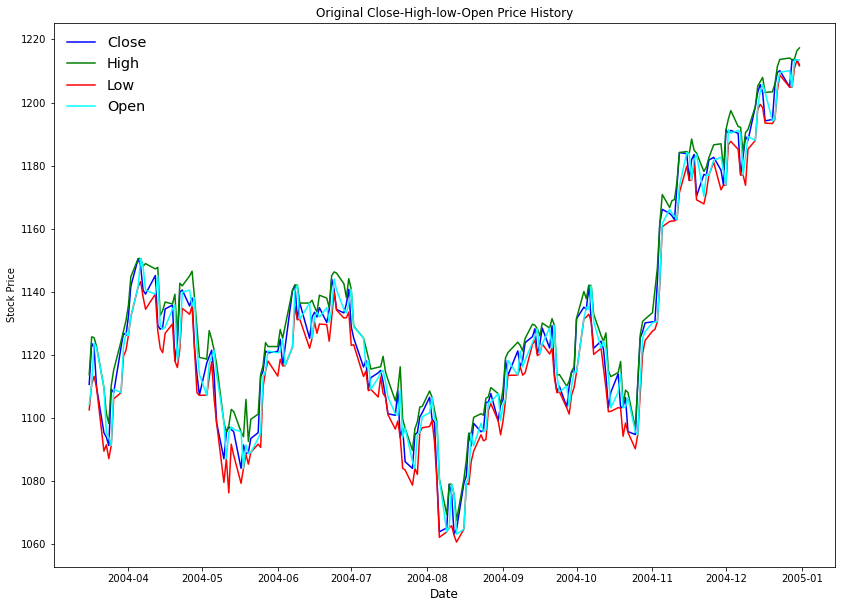

In [73]:
#original plot
# Simple plotting of Amazon Stock Price

f, (ax1) = plt.subplots(1, figsize=(14,10))

# First Subplot:"Close Price History"
ax1.plot(sp_data.index[1054:], sp_data["Close"][1054:], color="blue",label='Close')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Original Close-High-low-Open Price History")

# Second Subplot:"High Price History"
ax1.plot(sp_data.index[1054:], sp_data["High"][1054:], color="green",label='High')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

# Third Subplot:Low Price History"
ax1.plot(sp_data.index[1054:], sp_data["Low"][1054:], color="red",label='Low')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

# Forth Subplot:Open Price History"
ax1.plot(sp_data.index[1054:], sp_data["Open"][1054:], color="cyan",label='Open')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

ax1.legend(loc='upper left', frameon=False, fontsize='x-large')

In [51]:

scaler = MinMaxScaler(feature_range=(0,1))
scaled_array = scaler.fit_transform(sp_data)

# df2 = pd.DataFrame(sp_data.index)
# df['Close'] = scaled_array.tolist()
df = pd.DataFrame(scaled_array, columns=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'])
df.index = sp_data.index

df.head()
# plt.plot(scaled_array)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,0.900745,0.893176,0.922459,0.903770,0.237955,0.903770
2000-01-04,0.870546,0.838590,0.903770,0.829439,0.269863,0.829439
2000-01-05,0.814933,0.812251,0.829439,0.833023,0.301481,0.833023
2000-01-06,0.813116,0.831482,0.833023,0.834807,0.304291,0.834807
2000-01-07,0.852317,0.842991,0.834807,0.885454,0.359220,0.885454


In [52]:
scaled_array[0]

array([0.90074505, 0.89317581, 0.92245909, 0.90376982, 0.23795511,
       0.90376982])

In [53]:
df['2000': '2004']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,0.900745,0.893176,0.922459,0.903770,0.237955,0.903770
2000-01-04,0.870546,0.838590,0.903770,0.829439,0.269863,0.829439
2000-01-05,0.814933,0.812251,0.829439,0.833023,0.301481,0.833023
2000-01-06,0.813116,0.831482,0.833023,0.834807,0.304291,0.834807
2000-01-07,0.852317,0.842991,0.834807,0.885454,0.359220,0.885454
...,...,...,...,...,...,...
2004-12-27,0.550933,0.581852,0.577288,0.570348,0.233905,0.570348
2004-12-28,0.550151,0.581852,0.570348,0.581830,0.259117,0.581830
2004-12-29,0.550562,0.589894,0.581830,0.581710,0.235517,0.581710


In [54]:
#tf.disable_v2_behavior()
df = df.values
#df = df.reshape(-1, 1)
df

array([[0.90074505, 0.89317581, 0.92245909, 0.90376982, 0.23795511,
        0.90376982],
       [0.87054563, 0.83859019, 0.90376982, 0.82943929, 0.26986266,
        0.82943929],
       [0.81493269, 0.81225089, 0.82943929, 0.83302253, 0.30148089,
        0.83302253],
       ...,
       [0.55056207, 0.58989367, 0.58183037, 0.58171036, 0.23551658,
        0.58171036],
       [0.55403539, 0.59317453, 0.58171036, 0.5818437 , 0.19579746,
        0.5818437 ],
       [0.55517547, 0.59082731, 0.5818437 , 0.57967239, 0.17806645,
        0.57967239]])

In [55]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [56]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, :6])
        y.append(df[i, :6])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [57]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [58]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 6))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 6))

In [59]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=6))

In [60]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 6))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 6))

In [61]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [62]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
30/30 [==============================] - 15s 143ms/step - loss: 0.0915
Epoch 2/50
30/30 [==============================] - 5s 166ms/step - loss: 0.0136
Epoch 3/50
30/30 [==============================] - 5s 158ms/step - loss: 0.0102
Epoch 4/50
30/30 [==============================] - 4s 145ms/step - loss: 0.0095
Epoch 5/50
30/30 [==============================] - 5s 149ms/step - loss: 0.0093
Epoch 6/50
30/30 [==============================] - 5s 160ms/step - loss: 0.0084
Epoch 7/50
30/30 [==============================] - 5s 152ms/step - loss: 0.0087
Epoch 8/50
30/30 [==============================] - 4s 141ms/step - loss: 0.0086
Epoch 9/50
30/30 [==============================] - 5s 167ms/step - loss: 0.0066
Epoch 10/50
30/30 [==============================] - 5s 171ms/step - loss: 0.0072
Epoch 11/50
30/30 [==============================] - 5s 159ms/step - loss: 0.0067
Epoch 12/50
30/30 [==============================] - 5s 161ms/step - loss: 0.0060
Epoch 13/50
30/30 [=====

In [63]:
model = load_model('stock_prediction.h5')

In [64]:
predictions = model.predict(x_test)
# predictions.shape
predictions = scaler.inverse_transform(predictions)
df_Result = pd.DataFrame(predictions, columns=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'])
df_Result.index = sp_data.index[1054:]
df_Result
# y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# fig, ax = plt.subplots(figsize=(16,8))
# ax.set_facecolor('#ffffff')
# ax.plot(y_test, color='red', label='Original price')
# plt.plot(predictions, color='cyan', label='Predicted price')
# plt.legend()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-03-16,1120.370117,1101.070190,1112.298950,1116.998657,1.357050e+09,1112.414307
2004-03-17,1119.804443,1100.384888,1111.425293,1116.397705,1.360004e+09,1111.478027
2004-03-18,1123.356567,1104.031616,1114.684448,1120.053589,1.349348e+09,1114.601929
2004-03-19,1129.467773,1110.414795,1120.589478,1126.375366,1.329121e+09,1120.347534
2004-03-22,1132.834229,1114.048462,1123.965820,1129.932251,1.313222e+09,1123.647217
...,...,...,...,...,...,...
2004-12-27,1226.221680,1207.208496,1215.851929,1223.108765,1.226551e+09,1215.042725
2004-12-28,1237.305908,1218.488525,1226.888794,1234.441650,1.196066e+09,1225.925903
2004-12-29,1242.347534,1223.653687,1232.128418,1239.681763,1.174320e+09,1231.078125


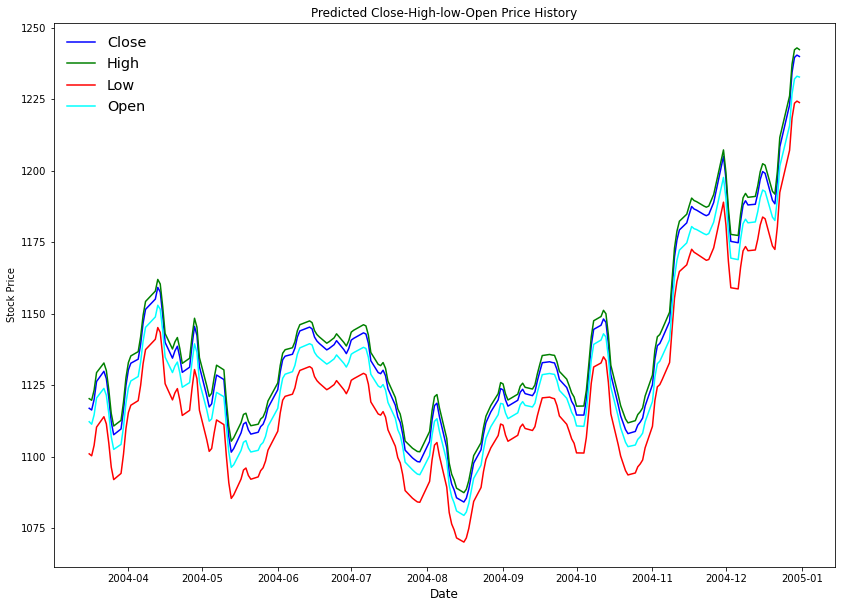

In [65]:
# Simple plotting of Amazon Stock Price

f, (ax1) = plt.subplots(1, figsize=(14,10))

# First Subplot:"Close Price History"
ax1.plot(df_Result.index, df_Result["Close"], color="blue", label='Close')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Predicted Close-High-low-Open Price History")

# Second Subplot:"High Price History"
ax1.plot(df_Result.index, df_Result["High"], color="green", label='High')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

# Third Subplot:Low Price History"
ax1.plot(df_Result.index, df_Result["Low"], color="red", label='Low')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

# Forth Subplot:Open Price History"
ax1.plot(df_Result.index, df_Result["Open"], color="cyan", label='Open')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

ax1.legend(loc='upper left', frameon=False, fontsize='x-large')


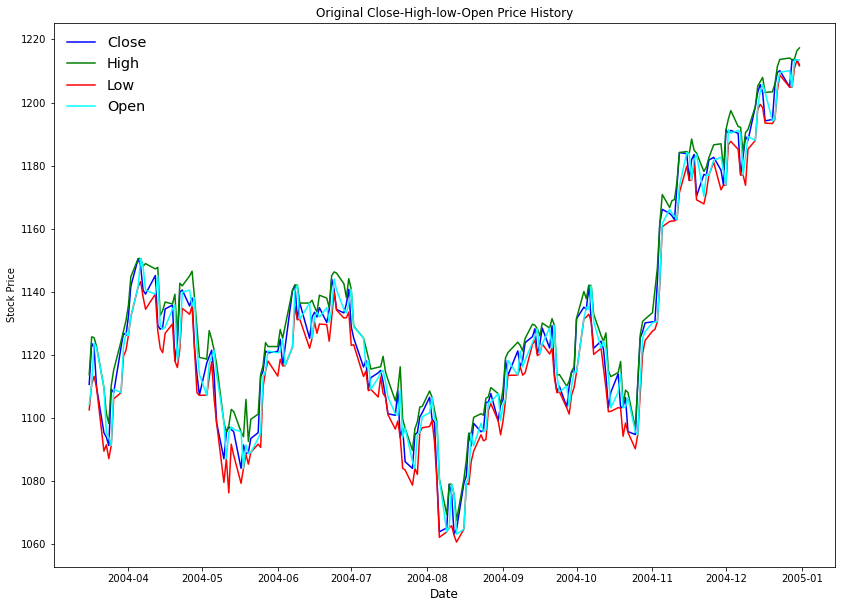

In [130]:
#original plot
# Simple plotting of Amazon Stock Price

f, (ax1) = plt.subplots(1, figsize=(14,10))

# First Subplot:"Close Price History"
ax1.plot(sp_data.index[1054:], sp_data["Close"][1054:], color="blue",label='Close')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Original Close-High-low-Open Price History")

# Second Subplot:"High Price History"
ax1.plot(sp_data.index[1054:], sp_data["High"][1054:], color="green",label='High')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

# Third Subplot:Low Price History"
ax1.plot(sp_data.index[1054:], sp_data["Low"][1054:], color="red",label='Low')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

# Forth Subplot:Open Price History"
ax1.plot(sp_data.index[1054:], sp_data["Open"][1054:], color="cyan",label='Open')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

ax1.legend(loc='upper left', frameon=False, fontsize='x-large')

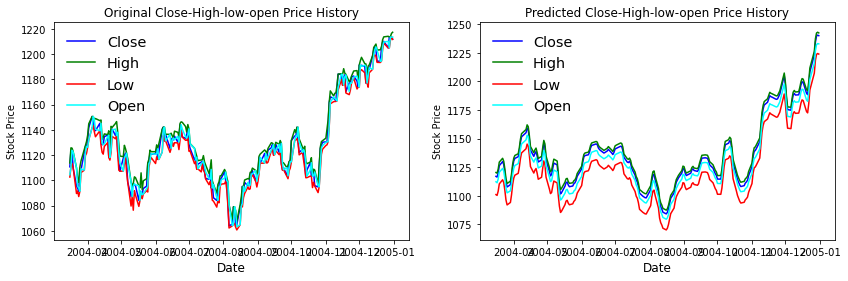

In [66]:
# Simple plotting of Amazon Stock Price

g, (bx1, bx2) = plt.subplots(1,2, figsize=(14,4))

# First Subplot:"Close Price History"
bx1.plot(sp_data.index[1054:], sp_data["Close"][1054:], color="blue", label='Close')
bx1.set_xlabel("Date", fontsize=12)
bx1.set_ylabel("Stock Price")
bx1.set_title("Original Close-High-low-open Price History")

# Second Subplot:"High Price History"
bx1.plot(sp_data.index[1054:], sp_data["High"][1054:], color="green", label='High')
bx1.set_xlabel("Date", fontsize=12)
bx1.set_ylabel("Stock Price")

# Third Subplot:Low Price History"
bx1.plot(sp_data.index[1054:], sp_data["Low"][1054:], color="red", label='Low')
bx1.set_xlabel("Date", fontsize=12)
bx1.set_ylabel("Stock Price")

# Forth Subplot:Open Price History"
bx1.plot(sp_data.index[1054:], sp_data["Open"][1054:], color="cyan", label='Open')
bx1.set_xlabel("Date", fontsize=12)
bx1.set_ylabel("Stock Price")
bx1.legend(loc='upper left', frameon=False, fontsize='x-large')

#-----------------------------------------OriginaL----------------------------------
# First Subplot:"Close Price History"
bx2.plot(df_Result.index, df_Result["Close"], color="blue", label='Close')
bx2.set_xlabel("Date", fontsize=12)
bx2.set_ylabel("Stock Price")
bx2.set_title("Predicted Close-High-low-open Price History")

# Second Subplot:"High Price History"
bx2.plot(df_Result.index, df_Result["High"], color="green", label='High')
bx2.set_xlabel("Date", fontsize=12)
bx2.set_ylabel("Stock Price")

# Third Subplot:Low Price History"
bx2.plot(df_Result.index, df_Result["Low"], color="red", label='Low')
bx2.set_xlabel("Date", fontsize=12)
bx2.set_ylabel("Stock Price")

# Forth Subplot:Open Price History"
bx2.plot(df_Result.index, df_Result["Open"], color="cyan" , label='Open')
bx2.set_xlabel("Date", fontsize=12)
bx2.set_ylabel("Stock Price")
bx2.legend(loc='upper left', frameon=False, fontsize='x-large')



# Fourth Subplot:"Volume History"
# ax2.plot(df_Result.index, df_Result["Volume"], color="orange")
# ax2.set_xlabel("Date", fontsize=12)
# ax2.set_ylabel("Stock Price")
# ax2.set_title("Volume History")
plt.show()

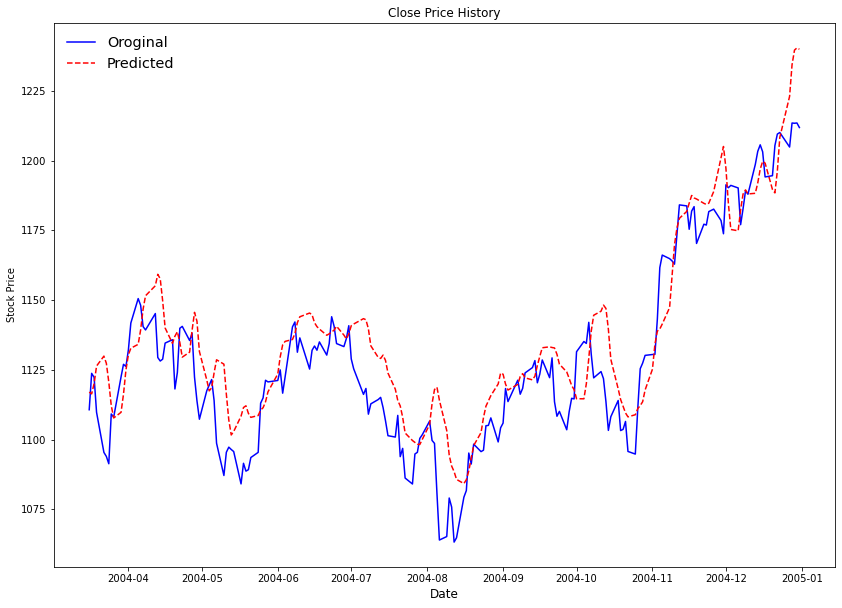

In [67]:
f, (ax1) = plt.subplots(1, figsize=(14,10))

# First Subplot:"Close Price History"
ax1.plot(sp_data.index[1054:], sp_data["Close"][1054:], color="blue", label ='Oroginal')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Close Price History")

#-------------------predicted----------------------
# Second Subplot:"High Price History"
ax1.plot(df_Result.index, df_Result["Close"], 'r--', label ='Predicted')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.legend(loc='upper left', frameon=False, fontsize='x-large')

Text(0, 0.5, 'Stock Price')

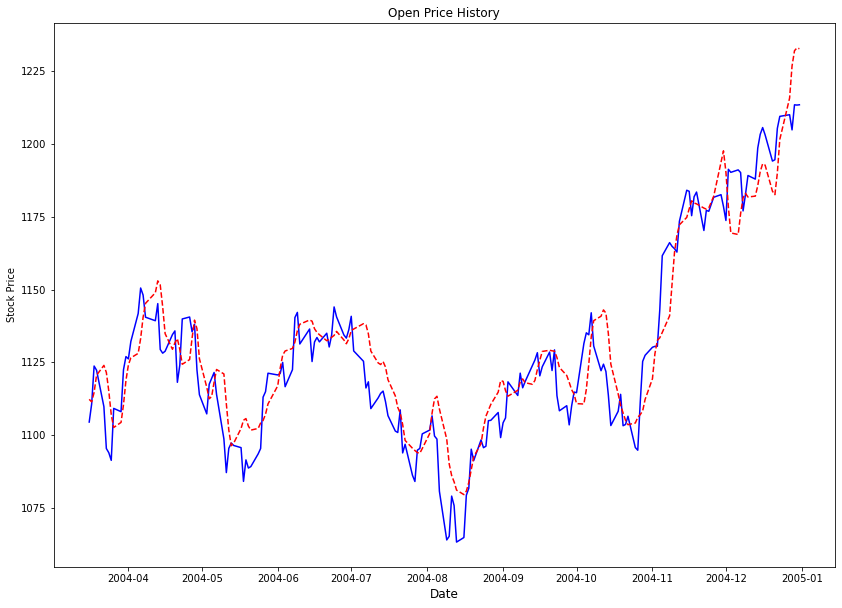

In [68]:
f, (ax1) = plt.subplots(1, figsize=(14,10))

# First Subplot:"Close Price History"
ax1.plot(sp_data.index[1054:], sp_data["Open"][1054:], color="blue", label ='Original')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Open Price History")

#-------------------predicted----------------------
# Second Subplot:"High Price History"
ax1.plot(df_Result.index, df_Result["Open"], 'r--', label ='Predicted')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

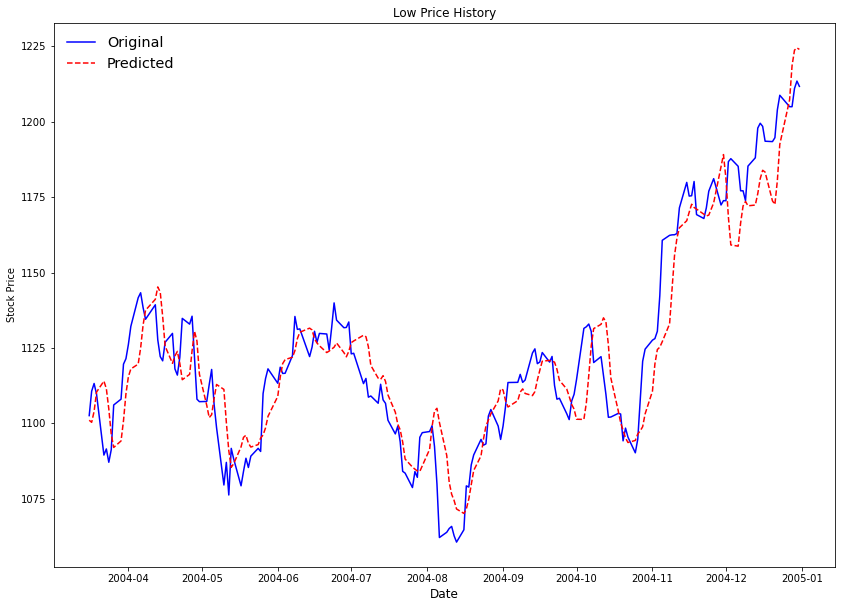

In [69]:
f, (ax1) = plt.subplots(1, figsize=(14,10))

# First Subplot:"Close Price History"
ax1.plot(sp_data.index[1054:], sp_data["Low"][1054:], color="blue", label ='Original')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Low Price History")

#-------------------predicted----------------------
# Second Subplot:"High Price History"
ax1.plot(df_Result.index, df_Result["Low"],'r--', label ='Predicted')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.legend(loc='upper left', frameon=False, fontsize='x-large')

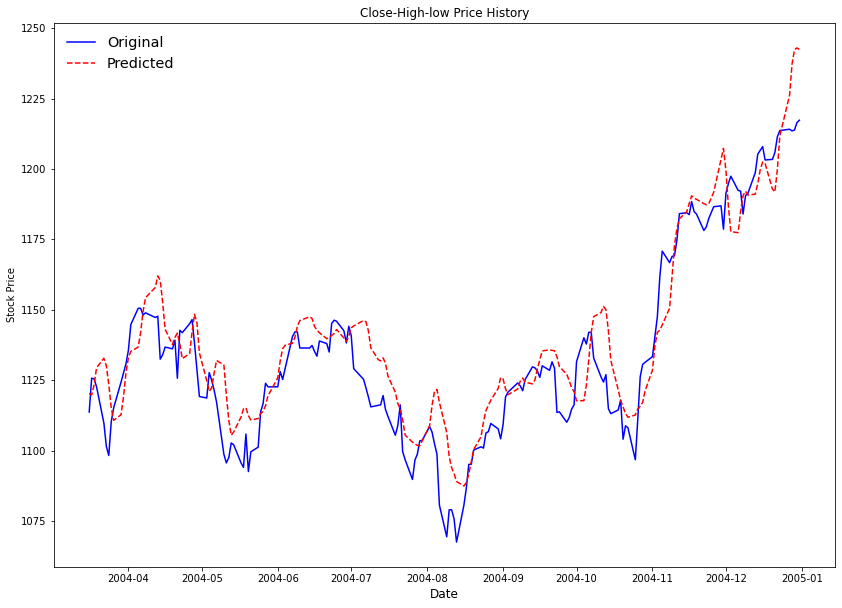

In [70]:
f, (ax1) = plt.subplots(1, figsize=(14,10))

# First Subplot:"Close Price History"
ax1.plot(sp_data.index[1054:], sp_data["High"][1054:], color="blue", label ='Original')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Close-High-low Price History")

#-------------------predicted----------------------
# Second Subplot:"High Price History"
ax1.plot(df_Result.index, df_Result["High"],'r--', label ='Predicted')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.legend(loc='upper left', frameon=False, fontsize='x-large')

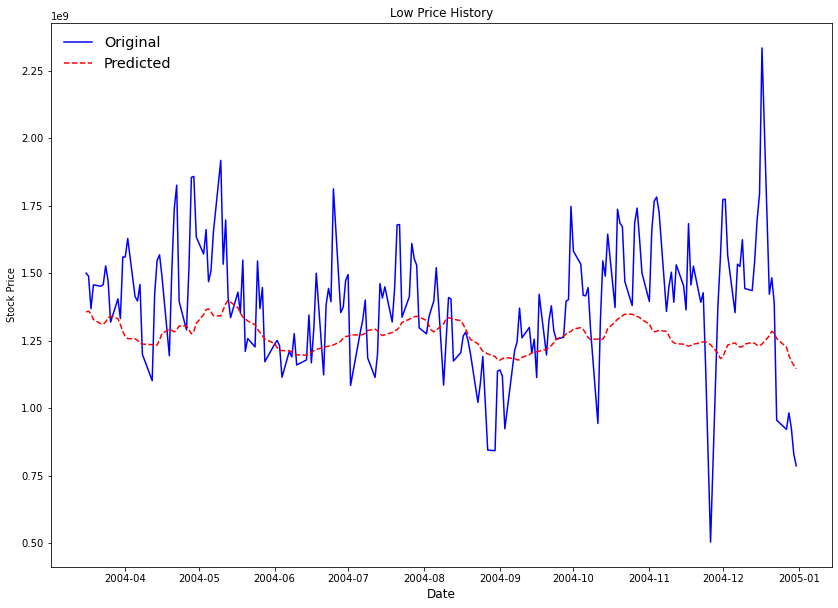

In [71]:
f, (ax1) = plt.subplots(1, figsize=(14,10))

# First Subplot:"Close Price History"
ax1.plot(sp_data.index[1054:], sp_data["Volume"][1054:], color="blue", label ='Original')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Low Price History")

#-------------------predicted----------------------
# Second Subplot:"High Price History"
ax1.plot(df_Result.index, df_Result["Volume"],'r--', label ='Predicted')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.legend(loc='upper left', frameon=False, fontsize='x-large')

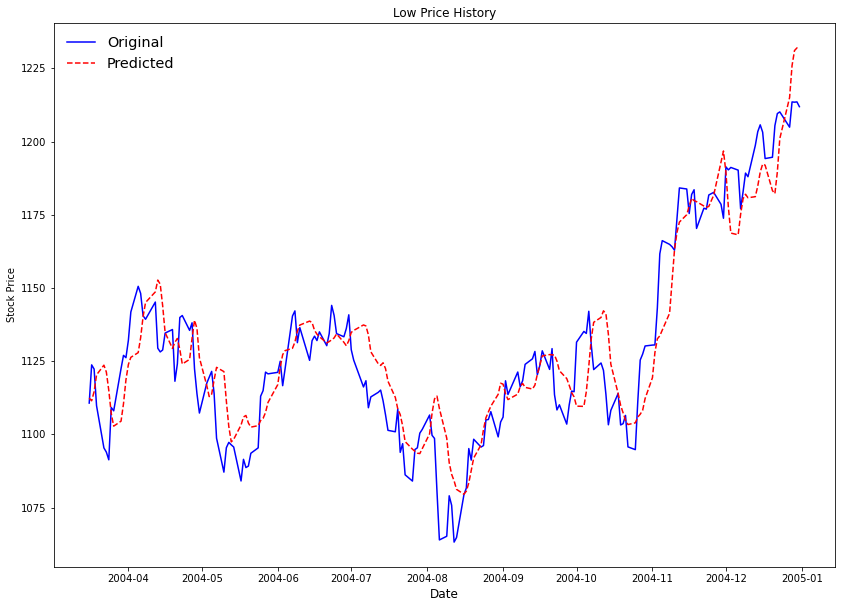

In [72]:
f, (ax1) = plt.subplots(1, figsize=(14,10))

# First Subplot:"Close Price History"
ax1.plot(sp_data.index[1054:], sp_data["Adj Close"][1054:], color="blue", label ='Original')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Low Price History")

#-------------------predicted----------------------
# Second Subplot:"High Price History"
ax1.plot(df_Result.index, df_Result["Adj Close"],'r--', label ='Predicted')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.legend(loc='upper left', frameon=False, fontsize='x-large')